In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("HousingDatas.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#to show no. of records and columns
df.shape


(506, 14)

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#to show no. of records
df.shape[0]


506

In [8]:
#to show no. of col
df.shape[1]


14

In [9]:
df.shape

(506, 14)

In [10]:
#Find Percentage of null value in each column
df.isnull().sum()/df.shape[0]*100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [11]:
#if null values in row : more than 5% then delete those rows
df.isnull().sum(axis=1)/df.shape[1]*100

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      7.142857
         ...   
501    7.142857
502    0.000000
503    0.000000
504    0.000000
505    7.142857
Length: 506, dtype: float64

In [12]:
#here we take variable A which is list object which hold record no. whose
#null values of row >5%
A=list(df[((df.isnull().sum(axis=1)/df.shape[1])*100)>5].index)
       #index means to hold record no. in list variable A

In [13]:
print(A) #to show record no whose null of rows >5%

[4, 6, 9, 14, 35, 36, 43, 47, 51, 53, 73, 74, 79, 87, 92, 103, 115, 116, 118, 119, 123, 126, 133, 138, 146, 147, 148, 150, 152, 155, 157, 163, 167, 173, 177, 183, 186, 191, 192, 193, 196, 205, 206, 207, 210, 215, 219, 226, 228, 229, 233, 236, 238, 240, 241, 245, 254, 262, 266, 271, 277, 281, 286, 288, 292, 294, 297, 301, 302, 303, 305, 316, 330, 332, 344, 349, 350, 355, 359, 367, 368, 369, 375, 376, 383, 388, 393, 394, 401, 406, 407, 409, 423, 426, 427, 429, 430, 440, 441, 442, 450, 451, 453, 458, 460, 465, 466, 473, 479, 482, 501, 505]


In [14]:
#to find the no. of roes which is null above 5%
len(A) #len() inbuilt function : to find the no. of records in given list

112

In [15]:
#to delete those rows whose null values >5%
for i in A : 
    df.drop(i,inplace=True) #permanent delete from df

In [16]:
df.shape

(394, 14)

In [17]:
#Again check null values in dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

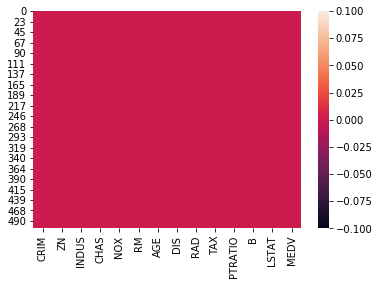

In [18]:
#to visualise of null values
sns.heatmap(df.isnull())
plt.show()

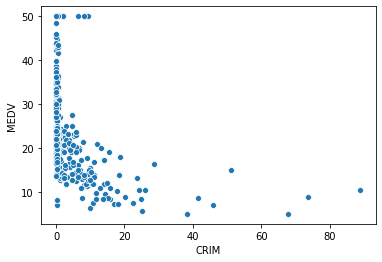

In [19]:
#check relation between input and output : use scatterplot() : only numerical
#type data
X=df["CRIM"]  #here X input  
Y=df["MEDV"] #Y output ,output always 1D
sns.scatterplot(data=df,x=X,y=Y)
plt.show()


In [20]:
X=df.drop("MEDV",axis=1) #to copy all columns apart from MEDV(target)
Y=df["MEDV"] #target
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

CRIM


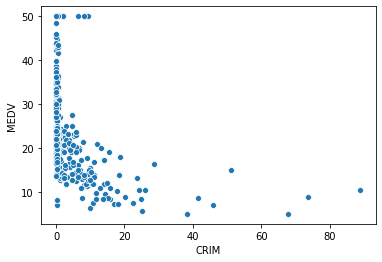

ZN


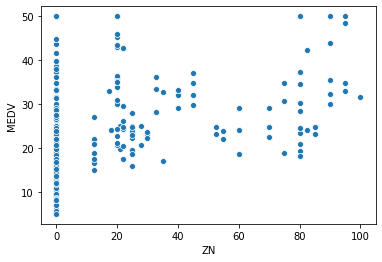

INDUS


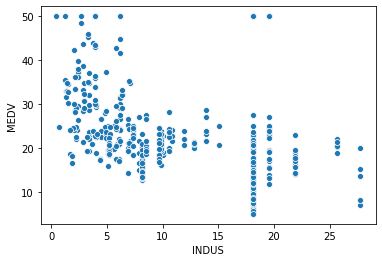

CHAS


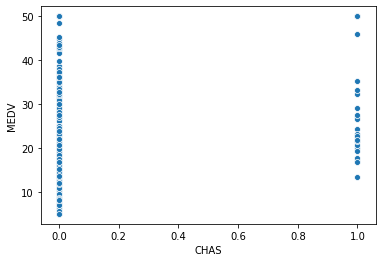

NOX


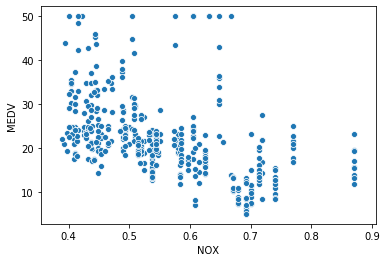

RM


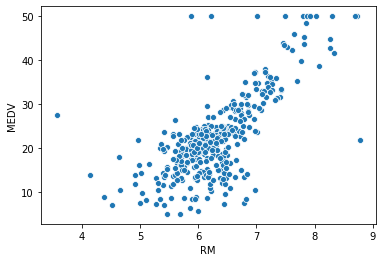

AGE


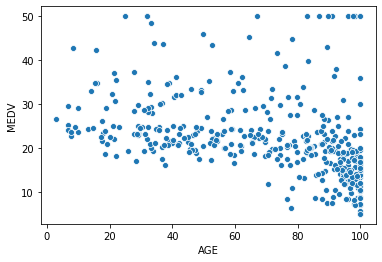

DIS


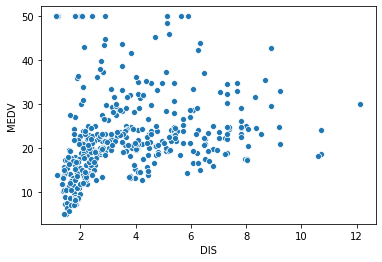

RAD


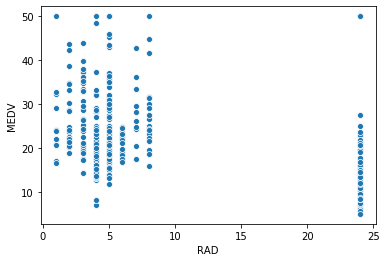

TAX


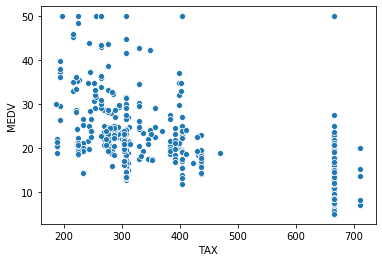

PTRATIO


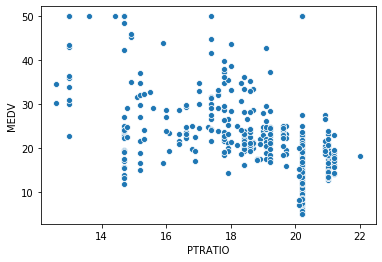

B


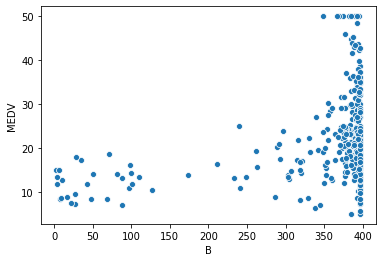

LSTAT


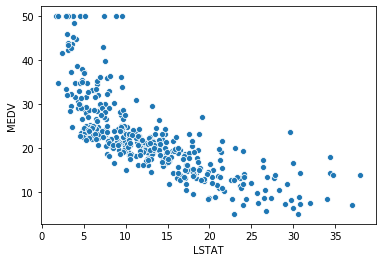

In [21]:
for col in X:
    print(col)
    sns.scatterplot(data=df,x=col,y=Y)
    plt.show()

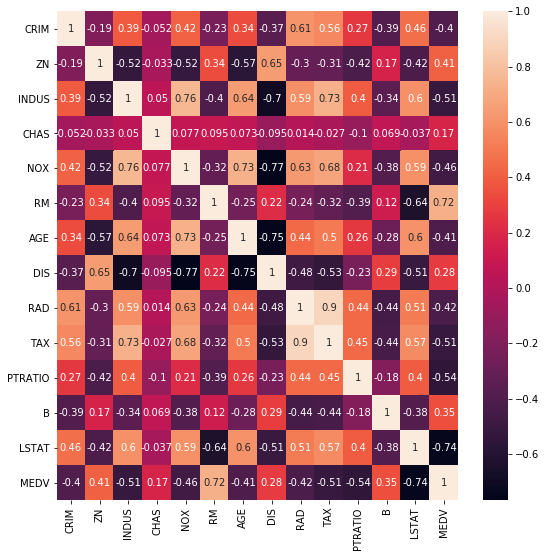

In [22]:
#Again check relation of input and output with the help of correlation 
#corr() inbuilt function , we visualise the corr with input and output
#: use heatmap()
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True) #annot=True : show corr value in graph
plt.show()


In [23]:
# select all input features from dataset (no apply data analysis)
#select input and output from dataframe 
X=df.drop("MEDV",axis=1) #to hold all columns apart from medv it is input features
Y=df["MEDV"] #target means output variable which want to predict

In [24]:
#perform the model with Linear regression algorithm (Multiple Linear Regression)
#means many input and one output


In [25]:
#Divide the dataset into 70% and 30% for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#we train the model with the help of LinearRegression class with 70% data
#call LinearRegression inbuilt class
from sklearn.linear_model import LinearRegression 


In [27]:
#create object of class LinearRegression 
lr=LinearRegression() #lr user defined object of LinearRegression  class

In [28]:
#we train the model use fit() with 70%: inbuilt method of LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#check coefficient(m or slope or gradient or tan) and intercept(b)
lr.coef_  #coef_  inbuilt method of linearregression class


array([-3.58636228e-02,  3.24829498e-02,  1.33493183e-02,  3.40461874e+00,
       -1.48111830e+01,  4.22920221e+00, -5.62155714e-03, -1.33656374e+00,
        2.50294586e-01, -1.10515925e-02, -8.41858855e-01,  1.12437919e-02,
       -5.64539136e-01])

In [30]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
#Intercept
lr.intercept_  #intercept_ inbuilt method of linearregression class

29.744975249353413

In [32]:
#we test the model with 30% data :
#use predict() inbuilt method of LinearRegression class
#predict()   : Y_pred=m1X1+m2X2+m3X3+......+b
Y_pred=lr.predict(X_test)


In [33]:
Y_test

96     21.4
289    24.8
456    12.7
143    15.6
267    50.0
       ... 
16     23.1
391    23.2
209    20.0
107    20.4
431    14.1
Name: MEDV, Length: 119, dtype: float64

In [34]:
Y_pred

array([ 2.44908793e+01,  2.64769221e+01,  1.16163310e+01,  1.16049213e+01,
        4.09000871e+01,  3.16080884e+01,  2.88331358e+01,  2.26650275e+01,
        2.87779403e+01,  1.89605648e+01,  1.84150912e+01,  2.13681864e+01,
        1.30293208e+01,  4.49282661e+01,  2.00830865e+01,  2.57955766e+01,
        2.06769804e+01,  2.75261978e+01,  1.00795072e+01,  2.27467133e+01,
        2.74703906e+01,  2.42633586e+01,  7.74289772e+00,  2.47865178e+01,
        1.87689188e+01,  8.88476320e+00,  1.96478669e+01,  7.58616039e+00,
        2.83424309e+01,  2.34643286e+01,  1.74805502e+01,  2.30425085e+01,
        2.87306406e+01,  1.67836243e+01,  3.41380404e+01,  2.47047102e+01,
        4.25762143e+01,  1.58288872e+01,  3.31715651e+01,  1.58096962e+01,
        3.17190047e+01,  2.50542334e+01,  1.43750479e+01,  2.29986601e+01,
        1.91020388e+01,  4.13029346e+01,  1.98498741e+01,  2.72777395e+01,
        2.14824161e+01,  1.96104382e+01,  2.33465170e+01,  3.67050811e+01,
        2.74829814e+01,  

In [35]:
#mean squared error 
from sklearn.metrics import mean_squared_error
#mean_squared_error inbuilt class 
#MSE=sum[(original output-predicted output)^2]/N
#N no. of records

In [36]:
mean_squared_error(Y_test,Y_pred)


21.174577734273814

In [37]:
#root mean squared error
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("root mean squared error : ",rmse)


root mean squared error :  4.601584263519882


In [38]:
#Evaluation of model with the help of r2_score() inbuilt function
#r2_score() inbuilt function are defined in r2_score inbuilt class
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)  #range of r2_score : 0 to +1 
#if r2_score >0.5 then ok 
#0.73 means 73 %  do correct prediction but try aprox. above 95% 

0.735751699930767

In [39]:
#means good but not better because model is overfit 

In [40]:
#input LSTAT and input CRIM : both are corelated each other 0.46
#then check corr between input LSTAT and output MEDV : - -0.74
#and check corr between input CRIM and output MEDV : - -0.4
#here remove input CRIM 
#here remove ZN ,INDUS

#here relation between chas input and output medv is 0.17 it is bad corr
#means chas input remove
#remove NOX why ? because NOX and LSTAT both input are corelated each other
#and corr() value of LSTAT with o/p is > than NOX so NOX remove
#remove RM input because Rm and LSTAT both input are corelated each other
#and corr() value of LSTAT with o/p is > than RM so RM remove

#remove age input because age and LSTAT both input are corelated each other
#and corr() value of LSTAT with o/p is > than age so age remove

##remove dis input because dis and LSTAT both input are corelated each other
#and corr() value of LSTAT with o/p is > than dis so dis remove

In [41]:
#perform model after data analysis in dataset
#Select input and output 
X=df[["LSTAT"]] #input always 2D
Y=df["MEDV"] #output


In [42]:
#Divide the dataset into 70% and 30% for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [43]:
#train the model with the linear regression class
#first create the object of linear regression
lr=LinearRegression()

In [44]:
#We train the model with 70% data use fit() method
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#to show coefficient
lr.coef_

array([-1.00135706])

In [46]:
#check intercept
lr.intercept_


34.94499699749179

In [47]:
#we test the model with 30% data :
#use predict() inbuilt method of LinearRegression class
Y_pred=lr.predict(X_test) #Y_pred=mX+b


In [48]:
#root mean squared error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",mse)
rmse=np.sqrt(mse)
print("root mean squared error : ",rmse)


Mean Squared Error :  41.05214416501693
root mean squared error :  6.407194718831083


In [49]:
r2_score(Y_test,Y_pred)


0.48768946205505814

In [50]:
#Assumption of linear regression 
'''1. There should be linearrelation ship between input and output variables
   2. if relation is linear so this should be homoskedastic relation(means 
   datapoints are close each other) not heteroskeastic relation 
   (means datapoints are scatterd)
   3. There should be no multicolineraity (means not correlated with 2 input
     each other)
    4. Relation should be normal distributed curve means well shaped curve
    means mean=median=mode means no skewness'''


'1. There should be linearrelation ship between input and output variables\n   2. if relation is linear so this should be homoskedastic relation(means \n   datapoints are close each other) not heteroskeastic relation \n   (means datapoints are scatterd)\n   3. There should be no multicolineraity (means not correlated with 2 input\n     each other)\n    4. Relation should be normal distributed curve means well shaped curve\n    means mean=median=mode means no skewness'